# Nhập các Thư viện

Dòng lệnh này nhập thư viện TensorFlow và gán cho nó bí danh là tf. Việc nhập với tên tf giúp dễ dàng truy cập các hàm và lớp của TensorFlow bằng tiền tố tf., giúp mã ngắn gọn và dễ đọc hơn. Trong dự án, TensorFlow có thể sẽ được sử dụng để xây dựng, huấn luyện và dự đoán với các mô hình mạng nơ-ron.

In [4]:
import tensorflow as tf

# Tham số cấu hình
Đoạn mã thiết lập ba biến: IMG_SIZE, BATCH_SIZE và EPOCHS. Đây là các biến thường được sử dụng trong lĩnh vực học máy, đặc biệt là khi xử lý ảnh và huấn luyện mô hình. Cụ thể:

- IMG_SIZE = (128, 128): Dòng này xác định kích thước mà tất cả các ảnh sẽ được thay đổi về. Trong trường hợp này, mỗi ảnh sẽ được chuyển về kích thước 128 pixel chiều rộng và 128 pixel chiều cao. Đây là bước tiền xử lý phổ biến trong các bài toán học máy với dữ liệu ảnh, giúp đảm bảo mọi ảnh đầu vào có cùng kích thước, từ đó mô hình có thể xử lý hiệu quả hơn.

- BATCH_SIZE = 32: Biến này xác định số lượng mẫu (ở đây là ảnh) sẽ được xử lý cùng lúc trong một lần lặp khi huấn luyện mô hình. Sau mỗi batch, mô hình sẽ cập nhật trọng số dựa trên kết quả tính toán lỗi. Batch size bằng 32 nghĩa là mỗi lần huấn luyện, mô hình sẽ xử lý 32 ảnh trước khi cập nhật tham số. Việc chọn batch size phù hợp giúp cân bằng giữa tốc độ huấn luyện và mức sử dụng bộ nhớ.

- EPOCHS = 10: Biến này chỉ số lần toàn bộ tập dữ liệu huấn luyện sẽ được đưa qua mô hình trong quá trình huấn luyện. Một epoch là một lượt đi qua toàn bộ dữ liệu huấn luyện. Việc huấn luyện nhiều epoch giúp mô hình học tốt hơn các đặc trưng của dữ liệu, tuy nhiên cũng cần chú ý tránh hiện tượng overfitting (quá khớp), khi mô hình học quá kỹ dữ liệu huấn luyện và hoạt động kém trên dữ liệu mới.

In [5]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

# Chuẩn bị dữ liệu
- Nguồn: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
- Thư mục dữ liệu đã được chia 3 mục: train, val and test

In [6]:
train_dir = r'D:\project\wildfire_prediction_dataset\v1\data\train'
val_dir = r'D:\project\wildfire_prediction_dataset\v1\data\valid'

# Bỏ qua lỗi khi tải ảnh bị cắt ngắn

Trong thư dataset, đôi khi có nhiều bức ảnh không thiếu pixel hoặc đã bị cắt mất pixel, điều này khiến cho nó không thể đọc được toàn bộ nội dung của ảnh. Trong trường hợp này, thư viện Pillow sẽ được dùng để thăm dò và kiểm tra các ảnh.

## Giải thích câu lệnh


Dòng lệnh này nhập mô-đun ImageFile từ thư viện Python Imaging Library (PIL). Khi nhập ImageFile, có thể sử dụng các tính năng xử lý ảnh nâng cao, như tải ảnh một cách linh hoạt hơn hoặc tùy chỉnh cách phân tích dữ liệu ảnh.

In [ ]:
from PIL import ImageFile

Dòng lệnh này thiết lập thuộc tính LOAD_TRUNCATED_IMAGES của module ImageFile thành True. Mặc định, thư viện Pillow (Python Imaging Library) sẽ báo lỗi nếu gặp phải tệp ảnh bị thiếu hoặc không đầy đủ dữ liệu. Khi đặt thuộc tính này là True, Pillow sẽ cố gắng tải các ảnh bị thiếu dữ liệu thay vì dừng chương trình. Điều này hữu ích trong các quy trình xử lý dữ liệu khi muốn tránh bị gián đoạn do các tệp ảnh bị hỏng hoặc tải chưa hoàn chỉnh. Tuy nhiên, việc tải các ảnh bị thiếu dữ liệu có thể dẫn đến ảnh hiển thị không đúng hoặc bị mất một phần nội dung nên sử dụng thiết lập này khi muốn xử lý càng nhiều ảnh càng tốt, kể cả khi một số ảnh không hoàn chỉnh.

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Xử lý ảnh

## Giải thích câu lệnh


- **from**: Từ khóa trong Python dùng để chỉ định lấy một phần cụ thể (module, class, function,...) từ một thư viện hoặc module lớn hơn.

- **tensorflow**: Đây là tên của thư viện mã nguồn mở nổi tiếng dùng cho học sâu (deep learning) và học máy (machine learning) do Google phát triển.

- **keras**: Là một API cấp cao của TensorFlow, giúp xây dựng và huấn luyện các mô hình học sâu một cách dễ dàng và trực quan.

- **preprocessing**: Đây là một module con trong keras, chứa các công cụ và hàm phục vụ cho việc tiền xử lý dữ liệu (preprocessing), đặc biệt là dữ liệu ảnh và chuỗi.

- **image**: Là một module con bên trong preprocessing, chuyên dùng cho các thao tác tiền xử lý dữ liệu ảnh như chuẩn hóa, tăng cường dữ liệu, chuyển đổi định dạng,...

- **import**: Từ khóa trong Python dùng để nhập (sử dụng) một class, function hoặc module vào chương trình.

- **ImageDataGenerator**: Đây là tên một lớp (class) trong module image. Lớp này cung cấp các phương thức để tạo ra các generator sinh dữ liệu ảnh theo lô (batch), đồng thời hỗ trợ các kỹ thuật tăng cường dữ liệu (data augmentation) như xoay, lật, phóng to/thu nhỏ, chuẩn hóa,... giúp cải thiện hiệu quả huấn luyện mô hình học sâu.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Đoạn mã này tạo một đối tượng có tên là train_datagen từ lớp ImageDataGenerator. Các tham số được thiết lập ở đây bao gồm:
+ rescale=1./255: Chuẩn hóa giá trị pixel của tất cả các ảnh từ khoảng [0, 255] về [0, 1]. Việc chuẩn hóa này giúp mô hình học sâu huấn luyện hiệu quả hơn và là một thực hành phổ biến.
+ rotation_range=20: Cho phép xoay ngẫu nhiên các ảnh trong phạm vi tối đa 20 độ khi huấn luyện, giúp mô hình trở nên linh hoạt hơn với các đối tượng có nhiều hướng khác nhau.
+ zoom_range=0.2: Phóng to hoặc thu nhỏ ảnh ngẫu nhiên trong phạm vi 20%, giúp mô hình học được các biến đổi về tỷ lệ và tổng quát hóa tốt hơn.
+ horizontal_flip=True: Lật ngang ảnh một cách ngẫu nhiên, hữu ích khi hướng ngang của đối tượng không quan trọng, giúp tăng tính đa dạng cho dữ liệu huấn luyện.

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


Dòng lệnh này tạo một đối tượng ImageDataGenerator có tên là val_datagen, dùng để tiền xử lý dữ liệu kiểm tra (validation). Tham số duy nhất được thiết lập là rescale=1./255, giúp chuẩn hóa giá trị pixel của ảnh từ khoảng [0, 255] về [0, 1]. Việc chuẩn hóa này rất quan trọng để đảm bảo dữ liệu đầu vào có cùng thang giá trị với dữ liệu huấn luyện, giúp mô hình dự đoán chính xác hơn. Khác với bộ sinh dữ liệu huấn luyện, val_datagen không áp dụng các phép tăng cường dữ liệu như xoay hay lật ảnh, vì mục tiêu của quá trình kiểm tra là đánh giá hiệu suất mô hình trên dữ liệu thực tế, không bị thay đổi.

In [12]:
val_datagen = ImageDataGenerator(rescale=1./255)

Đoạn mã này tạo ra một bộ sinh dữ liệu (generator) có tên là train_gen bằng cách sử dụng phương thức flow_from_directory của đối tượng train_datagen. Mục đích của generator này là để tải và tiền xử lý ảnh từ thư mục được chỉ định bởi biến train_dir, phục vụ cho quá trình huấn luyện mô hình học máy.
+ train_dir: đường dẫn đến thư mục chính chứa các ảnh huấn luyện, trong đó mỗi thư mục con đại diện cho một lớp (class) khác nhau.
+ target_size=IMG_SIZE: sẽ thay đổi kích thước tất cả các ảnh về đúng kích thước được chỉ định bởi IMG_SIZE (ví dụ: 128x128 pixel), đảm bảo dữ liệu đầu vào đồng nhất cho mô hình.
+ batch_size=BATCH_SIZE: xác định số lượng ảnh được tải và xử lý trong mỗi lần (batch), giúp quản lý bộ nhớ hiệu quả và tăng tốc độ huấn luyện.
+ class_mode='binary': cho biết đây là bài toán phân loại nhị phân (chỉ có hai lớp). Generator sẽ tự động gán nhãn 0 hoặc 1 dựa trên tên các thư mục con.

In [13]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 30250 images belonging to 2 classes.


Đoạn mã này tạo ra một bộ sinh dữ liệu (generator) có tên là val_gen bằng cách sử dụng phương thức flow_from_directory của đối tượng val_datagen. Generator này được dùng để tải và tiền xử lý các ảnh kiểm tra (validation) từ thư mục được chỉ định bởi biến val_dir.
+ val_dir là đường dẫn đến thư mục chính chứa các ảnh kiểm tra, trong đó mỗi thư mục con đại diện cho một lớp (class) khác nhau.
+ target_size=IMG_SIZE sẽ thay đổi kích thước tất cả các ảnh về đúng kích thước được chỉ định bởi IMG_SIZE (ví dụ: 128x128 pixel), đảm bảo dữ liệu đầu vào phù hợp với yêu cầu của mô hình.
+ batch_size=BATCH_SIZE xác định số lượng ảnh được tải và xử lý trong mỗi lần (batch), giúp quản lý bộ nhớ hiệu quả và tăng tốc độ kiểm tra.
+ class_mode='binary' cho biết đây là bài toán phân loại nhị phân (chỉ có hai lớp). Generator sẽ tự động gán nhãn 0 hoặc 1 dựa trên tên các thư mục con.

In [ ]:
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 6300 images belonging to 2 classes.


# Xây dựng mô hình CNN

## Giải thích câu lệnh

Dòng lệnh này nhập hai module layers và models từ API Keras của TensorFlow. 
- Module layers cung cấp các thành phần xây dựng mạng neural như Dense, Conv2D, MaxPooling2D,... giúp dễ dàng tạo ra các kiến trúc mạng khác nhau. 
- Module models cung cấp các công cụ để tạo và quản lý mô hình, bao gồm các lớp như Sequential và Model. 

In [15]:
from tensorflow.keras import layers, models

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

d:\project\wildfire_prediction_dataset\v1\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Đoạn mã này cấu hình mô hình để huấn luyện bằng cách chỉ định bộ tối ưu hóa, hàm mất mát và các chỉ số đánh giá. 
- Tham số optimizer='adam' chọn bộ tối ưu hóa Adam, một thuật toán phổ biến nhờ hiệu quả và khả năng điều chỉnh tốc độ học trong quá trình huấn luyện. 
- Tham số loss='binary_crossentropy' thiết lập hàm mất mát là binary cross-entropy, phù hợp cho các bài toán phân loại nhị phân khi mô hình dự đoán một trong hai lớp. 
- Tham số metrics=['accuracy'] yêu cầu mô hình theo dõi độ chính xác trong quá trình huấn luyện và đánh giá, cung cấp một thước đo đơn giản về tần suất dự đoán đúng của mô hình so với nhãn thực tế. 

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              

# Huấn luyện mô hình

Đoạn mã này huấn luyện mô hình mạng nơ-ron bằng phương thức fit. 
- Tham số train_gen cung cấp các lô dữ liệu huấn luyện và nhãn, được sinh và tăng cường dữ liệu tự động trong quá trình huấn luyện. 
- Tham số epochs=EPOCHS xác định số lần mô hình sẽ lặp qua toàn bộ tập dữ liệu huấn luyện. 
- Tham số validation_data=val_gen cung cấp các lô dữ liệu kiểm tra, cho phép đánh giá hiệu suất của mô hình trên dữ liệu chưa từng thấy sau mỗi epoch. 

In [18]:
model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

d:\project\wildfire_prediction_dataset\v1\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8752 - loss: 0.2964

d:\project\wildfire_prediction_dataset\v1\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


946/946 ━━━━━━━━━━━━━━━━━━━━ 1410s 1s/step - accuracy: 0.8752 - loss: 0.2963 - val_accuracy: 0.9389 - val_loss: 0.1637
Epoch 2/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 515s 544ms/step - accuracy: 0.9299 - loss: 0.1875 - val_accuracy: 0.9341 - val_loss: 0.1873
Epoch 3/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 534s 564ms/step - accuracy: 0.9348 - loss: 0.1682 - val_accuracy: 0.9537 - val_loss: 0.1362
Epoch 4/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 528s 558ms/step - accuracy: 0.9452 - loss: 0.1494 - val_accuracy: 0.9552 - val_loss: 0.1291
Epoch 5/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 529s 559ms/step - accuracy: 0.9496 - loss: 0.1377 - val_accuracy: 0.9481 - val_loss: 0.1380
Epoch 6/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 528s 558ms/step - accuracy: 0.9496 - loss: 0.1395 - val_accuracy: 0.9590 - val_loss: 0.1144
Epoch 7/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 527s 557ms/step - accuracy: 0.9541 - loss: 0.1221 - val_accuracy: 0.9606 - val_loss: 0.1179
Epoch 8/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 533s 563ms/step - accuracy: 0.9554 - loss: 0.1238

# Lưu mô hình

Dòng lệnh model.save('wildfire_detection_model.keras') sẽ lưu toàn bộ mô hình mạng nơ-ron đã được huấn luyện vào một tệp có tên là wildfire_detection_model.keras. 
- Việc lưu này bao gồm cả kiến trúc mô hình, trọng số và cấu hình huấn luyện, cho phép tải lại mô hình sau này mà không cần huấn luyện lại từ đầu. 
- Đuôi tệp .keras là định dạng gốc của Keras, được khuyến nghị sử dụng để lưu trữ và chia sẻ mô hình trong các dự án TensorFlow và Keras. 

In [ ]:
model.save('wildfire_detection_model.keras')

# Hiển thị cấu trúc mô hình

Hàm model.summary() sẽ in ra một bản tóm tắt chi tiết về kiến trúc của mô hình mạng nơ-ron của bạn. 
- Khi gọi phương thức này, nó sẽ hiển thị một bảng liệt kê từng lớp trong mô hình, loại lớp, kích thước đầu ra của mỗi lớp và số lượng tham số (trọng số và hệ số điều chỉnh) mà lớp đó có. 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

Dòng lệnh này nhập mô-đun pyplot từ thư viện matplotlib và gán cho nó bí danh là plt. 
- matplotlib.pyplot là một thư viện vẽ đồ thị rất phổ biến trong Python, đặc biệt hữu ích cho việc trực quan hóa dữ liệu và kết quả trong các dự án khoa học và học máy. 

In [ ]:
import matplotlib.pyplot as plt

# Lịch sử huấn luyện từ model.fit

- Dòng lệnh history = model.history cố gắng truy cập thuộc tính history của đối tượng model. Tuy nhiên, trong Keras, thuộc tính history không có sẵn trực tiếp trên model. Thay vào đó, khi huấn luyện mô hình bằng phương thức fit(), phương thức này sẽ trả về một đối tượng History, chứa thông tin về quá trình huấn luyện như giá trị loss và accuracy của từng epoch.
- Sau đó, có thể truy cập các chỉ số đã ghi lại thông qua history.history. Nếu bạn sử dụng model.history, nó sẽ không hoạt động như mong đợi và có thể gây ra lỗi. Để theo dõi và trực quan hóa quá trình huấn luyện đúng cách, hãy đảm bảo gán kết quả trả về của fit() vào một biến tên là history.

In [ ]:
history = model.history

# Vẽ đồ thị độ chính xác

### Giải thích code

Đoạn mã này sử dụng Matplotlib để trực quan hóa độ chính xác (accuracy) của mô hình trên tập huấn luyện và kiểm tra theo từng epoch.

- Dòng đầu tiên, plt.figure(figsize=(10, 5)), tạo một biểu đồ mới với kích thước rộng 10 inch và cao 5 inch, giúp biểu đồ và các nhãn dễ nhìn hơn. 
- Hai dòng tiếp theo vẽ các giá trị độ chính xác được lưu trong history.history: history.history['accuracy'] cho độ chính xác trên tập huấn luyện và history.history['val_accuracy'] cho độ chính xác trên tập kiểm tra. Mỗi đường được gán một nhãn để hiển thị trong chú thích (legend).
- plt.title('Training and Validation Accuracy') đặt tiêu đề cho biểu đồ, giúp người xem dễ hiểu nội dung biểu đồ. plt.xlabel('Epoch') và plt.ylabel('Accuracy') lần lượt đặt nhãn cho trục hoành (số epoch) và trục tung (giá trị accuracy). 
- Cuối cùng, plt.legend(loc='lower right') thêm chú thích vào góc dưới bên phải của biểu đồ, giúp phân biệt giữa đường biểu diễn độ chính xác của huấn luyện và kiểm tra.

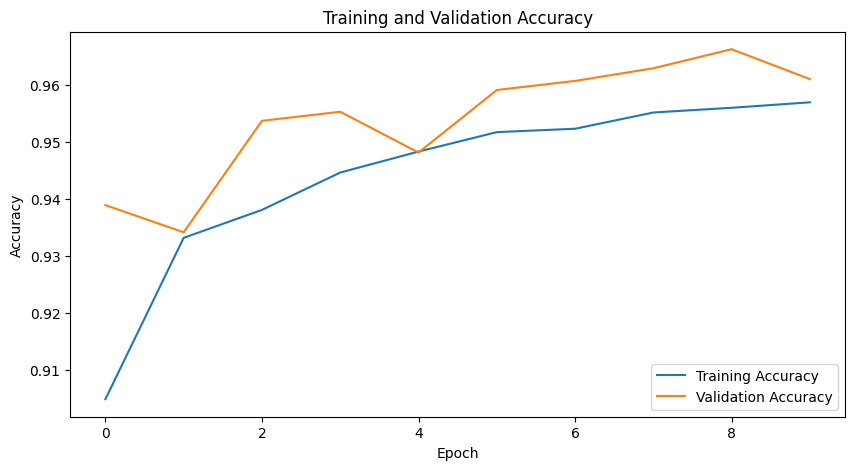

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Vẽ đồ thị mất mát

### Giải thích code

Đoạn mã này sử dụng Matplotlib để trực quan hóa giá trị loss (hàm mất mát) được ghi lại trong quá trình huấn luyện mô hình. 
- Dòng đầu tiên, plt.figure(figsize=(10, 5)), tạo một biểu đồ mới với kích thước rộng, giúp biểu đồ dễ quan sát hơn. 
- Hai dòng tiếp theo vẽ giá trị loss trên tập huấn luyện (history.history['loss']) và tập kiểm tra (history.history['val_loss']) theo từng epoch, với nhãn lần lượt là "Training Loss" và "Validation Loss". 
- Điều này giúp bạn so sánh sự thay đổi của lỗi mô hình trên cả hai tập dữ liệu qua từng epoch.
- plt.title('Training and Validation Loss') đặt tiêu đề cho biểu đồ, còn plt.xlabel('Epoch') và plt.ylabel('Loss') lần lượt đặt nhãn cho trục hoành (số epoch) và trục tung (giá trị loss). 
- plt.legend(loc='upper right') thêm chú thích vào góc trên bên phải, giúp phân biệt giữa hai đường loss của tập huấn luyện và kiểm tra. 
- Cuối cùng, plt.show() hiển thị biểu đồ ra màn hình. 

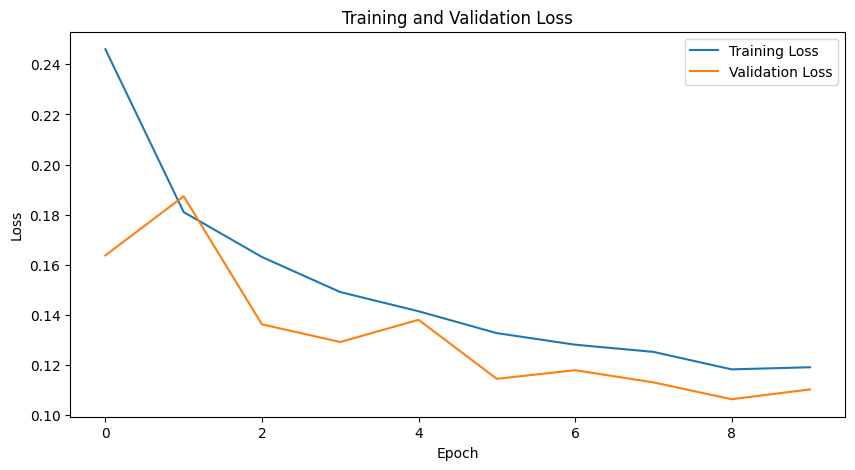

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Đoạn mã này nhập hai thư viện phổ biến trong Python: NumPy và Seaborn.

- Dòng lệnh import numpy as np nhập thư viện NumPy và gán cho nó bí danh là np. 
- NumPy là một gói cơ bản cho tính toán khoa học trong Python, cung cấp khả năng xử lý hiệu quả các mảng và ma trận nhiều chiều, cùng với nhiều hàm toán học để thao tác trên chúng. 
- NumPy thường được sử dụng cho xử lý dữ liệu, phân tích số liệu và là nền tảng cho nhiều thư viện khác trong hệ sinh thái khoa học dữ liệu Python.

- Dòng lệnh import seaborn as sns nhập thư viện Seaborn và gán cho nó bí danh là sns. 
- Seaborn là một thư viện trực quan hóa dữ liệu thống kê được xây dựng trên nền Matplotlib. 
- Nó cung cấp giao diện cấp cao để tạo ra các biểu đồ thống kê đẹp mắt và dễ hiểu như heatmap, box plot, violin plot,... 
- Seaborn thường được dùng để khám phá, trực quan hóa phân phối dữ liệu, mối quan hệ và xu hướng một cách trực quan. 

In [ ]:
import numpy as np
import seaborn as sns

# Đánh giá mô hình classification

Dòng lệnh này nhập hai hàm đánh giá quan trọng là confusion_matrix và classification_report từ module metrics của thư viện scikit-learn (sklearn).

- confusion_matrix được sử dụng để tính ma trận nhầm lẫn, giúp tóm tắt hiệu suất của mô hình phân loại bằng cách hiển thị số lượng dự đoán đúng và sai cho từng lớp (bao gồm true positive, true negative, false positive và false negative). Điều này giúp bạn hiểu rõ mô hình phân biệt các lớp tốt như thế nào.

- classification_report tạo ra một báo cáo chi tiết bao gồm các chỉ số như precision (độ chính xác), recall (độ bao phủ), F1-score và support cho từng lớp. Báo cáo này cung cấp cái nhìn tổng quan về hiệu suất của mô hình, giúp bạn dễ dàng nhận ra điểm mạnh và điểm yếu trong dự đoán.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

## Dự đoán trên tập validation

Đoạn mã này tạo ra dự đoán cho tập dữ liệu kiểm tra (validation) bằng mô hình đã huấn luyện và xử lý các dự đoán đó để phục vụ đánh giá.

- Dòng đầu tiên, predictions = model.predict(val_gen), sử dụng phương thức predict của mô hình để tính toán xác suất đầu ra cho từng mẫu trong bộ sinh dữ liệu kiểm tra (val_gen). Vì mô hình được thiết kế cho bài toán phân loại nhị phân với hàm sigmoid ở đầu ra, nên mỗi giá trị trong predictions sẽ là một xác suất nằm trong khoảng từ 0 đến 1, thể hiện mức độ tin tưởng của mô hình rằng mẫu đó thuộc về lớp dương.

- Dòng thứ hai, y_pred = np.round(predictions).flatten(), chuyển các xác suất này thành nhãn lớp nhị phân. np.round(predictions) sẽ làm tròn mỗi xác suất về 0 hoặc 1, tương ứng với việc gán nhãn dựa trên ngưỡng 0.5. Phương thức flatten() được sử dụng để chuyển mảng kết quả thành một vector một chiều, thường cần thiết để tương thích với các hàm đánh giá như ma trận nhầm lẫn hoặc classification report. Việc này giúp chuẩn bị dữ liệu dự đoán để phân tích và so sánh với nhãn thực tế.

In [ ]:
predictions = model.predict(val_gen)
y_pred = np.round(predictions).flatten()

## Lấy ground truth từ validation generator

Dòng lệnh này lấy các nhãn lớp thực tế của tập dữ liệu kiểm tra từ bộ sinh dữ liệu val_gen. 
- Thuộc tính classes của một đối tượng flow từ Keras ImageDataGenerator (như val_gen) chứa một mảng NumPy gồm các nhãn lớp (dưới dạng số nguyên) tương ứng với từng ảnh trong tập kiểm tra. 
- Khi gán val_gen.classes cho y_true, bạn sẽ có được các nhãn thực tế (ground truth) cần thiết để đánh giá dự đoán của mô hình, ví dụ như khi tính toán ma trận nhầm lẫn hoặc tạo báo cáo phân loại. 
- Bước này rất quan trọng để so sánh nhãn dự đoán của mô hình với nhãn thực tế và đánh giá hiệu suất của mô hình.

In [ ]:
y_true = val_gen.classes

# Confusion Matrix

Dòng lệnh này tính toán ma trận nhầm lẫn (confusion matrix) cho các dự đoán của mô hình. 
- Hàm confusion_matrix nhận vào hai tham số: y_true là các nhãn thực tế của dữ liệu kiểm tra, còn y_pred là các nhãn dự đoán do mô hình tạo ra. 
- Biến cm nhận kết quả là một ma trận thể hiện số lượng dự đoán đúng và sai cho từng lớp. 
- Trong bài toán phân loại nhị phân, ma trận nhầm lẫn là một bảng 2x2, thể hiện số lượng true positive, true negative, false positive và false negative. 

In [31]:
cm = confusion_matrix(y_true, y_pred)

## Hiển thị confusion matrix

Đoạn mã này trực quan hóa ma trận nhầm lẫn (cm) bằng cách sử dụng Matplotlib và Seaborn, giúp bạn dễ dàng đánh giá kết quả phân loại của mô hình.
- Dòng đầu tiên, plt.figure(figsize=(8, 6)), tạo một biểu đồ mới với kích thước 8x6 inch, đủ rộng để hiển thị heatmap và các nhãn. 
- Hàm sns.heatmap hiển thị ma trận nhầm lẫn dưới dạng lưới màu. 
- Tham số annot=True giúp hiển thị trực tiếp các giá trị số trong từng ô của ma trận, còn fmt='d' định dạng các số này dưới dạng số nguyên. cmap='Blues' sử dụng bảng màu xanh lam, giúp bạn dễ dàng phân biệt các giá trị lớn nhỏ qua sắc độ màu.
- Tham số xticklabels và yticklabels đặt nhãn cho các trục là 'Non-Wildfire' và 'Wildfire', giúp biểu đồ dễ hiểu hơn. 
- Ba dòng tiếp theo lần lượt đặt nhãn cho trục hoành (Predicted - Dự đoán), trục tung (True - Thực tế) và tiêu đề cho biểu đồ (Confusion Matrix). 
- Cuối cùng, plt.show() sẽ hiển thị biểu đồ ra màn hình.  

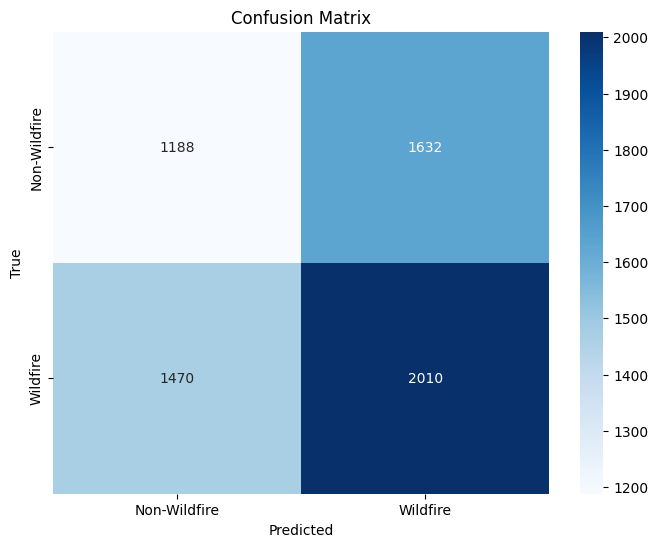

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Wildfire', 'Wildfire'], 
            yticklabels=['Non-Wildfire', 'Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## In classification report

Dòng lệnh này in ra một báo cáo phân loại chi tiết cho các dự đoán của mô hình trên tập dữ liệu kiểm tra. 
- Hàm classification_report từ thư viện scikit-learn sẽ so sánh nhãn thực tế (y_true) với nhãn dự đoán (y_pred) và tạo ra một bảng tổng hợp các chỉ số quan trọng cho từng lớp. Khi chỉ định target_names=['Non-Wildfire', 'Wildfire'], báo cáo sẽ hiển thị tên lớp rõ ràng thay vì các nhãn số.
- Báo cáo này bao gồm các chỉ số như precision (độ chính xác), recall (độ bao phủ), F1-score (trung bình điều hòa giữa precision và recall) và support (số lượng mẫu thực tế của mỗi lớp).  

In [33]:
print(classification_report(y_true, y_pred, target_names=['Non-Wildfire', 'Wildfire']))

              precision    recall  f1-score   support

Non-Wildfire       0.45      0.42      0.43      2820
    Wildfire       0.55      0.58      0.56      3480

    accuracy                           0.51      6300
   macro avg       0.50      0.50      0.50      6300
weighted avg       0.50      0.51      0.51      6300



# Biểu đồ F1-score

## In classification report

Dòng lệnh này tạo ra một báo cáo phân loại chi tiết bằng cách sử dụng hàm classification_report của scikit-learn và lưu kết quả vào biến report. 
- Hàm này so sánh nhãn thực tế (y_true) với nhãn dự đoán (y_pred) và tính toán các chỉ số đánh giá quan trọng như precision (độ chính xác), recall (độ bao phủ), F1-score và support (số lượng mẫu) cho từng lớp. 
- Khi chỉ định target_names=['Non-Wildfire', 'Wildfire'], báo cáo sẽ sử dụng tên lớp mô tả thay vì nhãn số, giúp kết quả dễ hiểu hơn.
- Tham số output_dict=True khiến kết quả trả về dưới dạng một từ điển Python thay vì một chuỗi định dạng sẵn. 
- Điều này cho phép dễ dàng truy cập từng chỉ số riêng lẻ để phân tích sâu hơn, trực quan hóa hoặc ghi log. 
- Từ điển report chứa các chỉ số cho từng lớp cũng như các giá trị trung bình tổng thể, rất hữu ích cho việc đánh giá chi tiết hiệu suất của mô hình.

In [48]:
report = classification_report(y_true, y_pred, target_names=['Non-Wildfire', 'Wildfire'], output_dict=True)

## Lấy f1-score cho từng class

Hai dòng lệnh này lấy giá trị F1-score cho từng lớp từ từ điển báo cáo phân loại (report). 
- Biến f1_non_wildfire sẽ nhận giá trị F1-score của lớp "Non-Wildfire", còn f1_wildfire nhận giá trị F1-score của lớp "Wildfire". 
- F1-score là chỉ số tổng hợp giữa precision (độ chính xác) và recall (độ bao phủ), cung cấp cái nhìn cân bằng về độ chính xác của mô hình đối với từng lớp, đặc biệt hữu ích khi dữ liệu bị mất cân bằng. 

In [49]:
f1_non_wildfire = report['Non-Wildfire']['f1-score']
f1_wildfire = report['Wildfire']['f1-score']

## Tạo dữ liệu cho biểu đồ

Hai dòng lệnh này tạo các danh sách để tổ chức tên các lớp và giá trị F1-score tương ứng, giúp dễ dàng phân tích hoặc trực quan hóa. 
- Dòng đầu tiên, classes = ['Non-Wildfire', 'Wildfire'], định nghĩa một danh sách các nhãn lớp dưới dạng chuỗi, đại diện cho hai loại trong bài toán phân loại của bạn. 
- Dòng thứ hai, f1_scores = [f1_non_wildfire, f1_wildfire], tạo một danh sách chứa các giá trị F1-score của từng lớp, với f1_non_wildfire và f1_wildfire là các giá trị F1-score đã được lấy ra từ báo cáo phân loại trước đó. 

In [50]:
classes = ['Non-Wildfire', 'Wildfire']
f1_scores = [f1_non_wildfire, f1_wildfire]

## Vẽ biểu đồ

Đoạn mã này tạo một biểu đồ cột để trực quan hóa giá trị F1-score của từng lớp trong bài toán phân loại bằng Matplotlib. 
- Dòng đầu tiên, plt.figure(figsize=(8, 6)), khởi tạo một biểu đồ mới với kích thước 8x6 inch, giúp biểu đồ rõ ràng và dễ quan sát. 
- Dòng plt.bar(classes, f1_scores, color=['skyblue', 'salmon']) vẽ một cột cho mỗi lớp, chiều cao của cột thể hiện giá trị F1-score, mỗi cột được tô màu khác nhau để dễ phân biệt.
- Ba dòng tiếp theo thêm nhãn và tiêu đề cho biểu đồ: plt.xlabel('Class') đặt nhãn cho trục x là "Class", plt.ylabel('F1-Score') đặt nhãn cho trục y là "F1-Score", và plt.title('F1-Score per Class') đặt tiêu đề cho biểu đồ. 
- Dòng plt.ylim([0, 1]) thiết lập giới hạn trục y từ 0 đến 1, phù hợp với thang giá trị của F1-score và giúp việc so sánh giữa các lớp trở nên trực quan hơn. 
- Cuối cùng, plt.show() sẽ hiển thị biểu đồ cột hoàn chỉnh. Biểu đồ này giúp bạn nhanh chóng so sánh hiệu suất của mô hình trên từng lớp khác nhau.

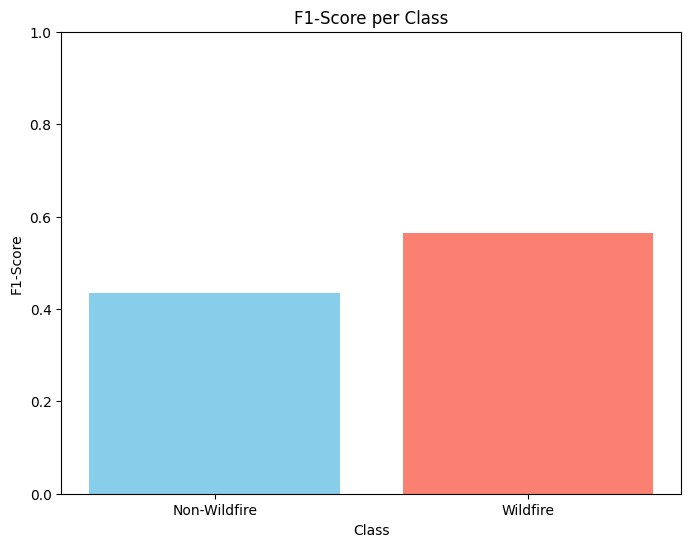

In [51]:

plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores, color=['skyblue', 'salmon'])
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score per Class')
plt.ylim([0, 1])  # Đặt giới hạn trục y từ 0 đến 1
plt.show()

# Biểu đồ precision và recall

## In classification report

Dòng lệnh này tạo ra một báo cáo phân loại chi tiết bằng cách sử dụng hàm classification_report của thư viện scikit-learn và lưu kết quả vào biến report. 
- Hàm này so sánh các nhãn lớp thực tế (y_true) với các nhãn dự đoán (y_pred) và tính toán các chỉ số đánh giá quan trọng như precision (độ chính xác), recall (độ bao phủ), F1-score và support (số lượng mẫu) cho từng lớp. 
- Khi chỉ định target_names=['Non-Wildfire', 'Wildfire'], báo cáo sẽ sử dụng tên lớp mô tả thay vì nhãn số, giúp kết quả dễ hiểu hơn.
- Tham số output_dict=True chuyển định dạng kết quả từ chuỗi định dạng sẵn sang một từ điển Python. . 
- Từ điển report chứa các chỉ số cho từng lớp cũng như các giá trị trung bình tổng thể, rất hữu ích cho việc đánh giá chi tiết hiệu suất của mô hình.

In [56]:
report = classification_report(y_true, y_pred, target_names=['Non-Wildfire', 'Wildfire'], output_dict=True)

## Lấy precision và recall cho từng class

Các dòng lệnh này lấy ra các chỉ số precision (độ chính xác) và recall (độ bao phủ) cho từng lớp từ từ điển báo cáo phân loại (report).

- precision_non_wildfire và recall_non_wildfire lấy giá trị precision và recall của lớp "Non-Wildfire".
- precision_wildfire và recall_wildfire lấy giá trị precision và recall của lớp "Wildfire".

In [57]:
precision_non_wildfire = report['Non-Wildfire']['precision']
recall_non_wildfire = report['Non-Wildfire']['recall']
precision_wildfire = report['Wildfire']['precision']
recall_wildfire = report['Wildfire']['recall']

## Tạo dữ liệu cho biểu đồ


- Dòng đầu tiên, classes = ['Non-Wildfire', 'Wildfire'], định nghĩa một danh sách các nhãn lớp dưới dạng chuỗi, đại diện cho hai loại trong bài toán phân loại của bạn. 
- Dòng thứ hai, precision_scores = [precision_non_wildfire, precision_wildfire], tạo một danh sách chứa các giá trị precision của từng lớp, với thứ tự tương ứng với danh sách classes. 
- Tương tự, recall_scores = [recall_non_wildfire, recall_wildfire] lưu các giá trị recall cho từng lớp theo cùng thứ tự. 

In [58]:
classes = ['Non-Wildfire', 'Wildfire']
precision_scores = [precision_non_wildfire, precision_wildfire]
recall_scores = [recall_non_wildfire, recall_wildfire]

## Vẽ biểu đồ precision

Đoạn mã này tạo một biểu đồ cột để trực quan hóa giá trị precision (độ chính xác) của từng lớp trong bài toán phân loại bằng Matplotlib. 
- Dòng plt.figure(figsize=(10, 6)) khởi tạo một biểu đồ mới với kích thước 10x6 inch, giúp biểu đồ rộng rãi và dễ quan sát. 
- Dòng plt.bar(classes, precision_scores, color=['skyblue', 'salmon']) vẽ một cột cho mỗi lớp, chiều cao của cột thể hiện giá trị precision, mỗi cột được tô màu khác nhau để dễ phân biệt.
- Các dòng tiếp theo thêm nhãn và tiêu đề cho biểu đồ: plt.xlabel('Class') đặt nhãn cho trục x là "Class", plt.ylabel('Precision') đặt nhãn cho trục y là "Precision", và plt.title('Precision per Class') đặt tiêu đề cho biểu đồ. 
- Dòng plt.ylim([0, 1]) thiết lập giới hạn trục y từ 0 đến 1, phù hợp với thang giá trị của precision và giúp việc so sánh giữa các lớp trở nên trực quan hơn. 
- Cuối cùng, plt.show() sẽ hiển thị biểu đồ cột hoàn chỉnh. 

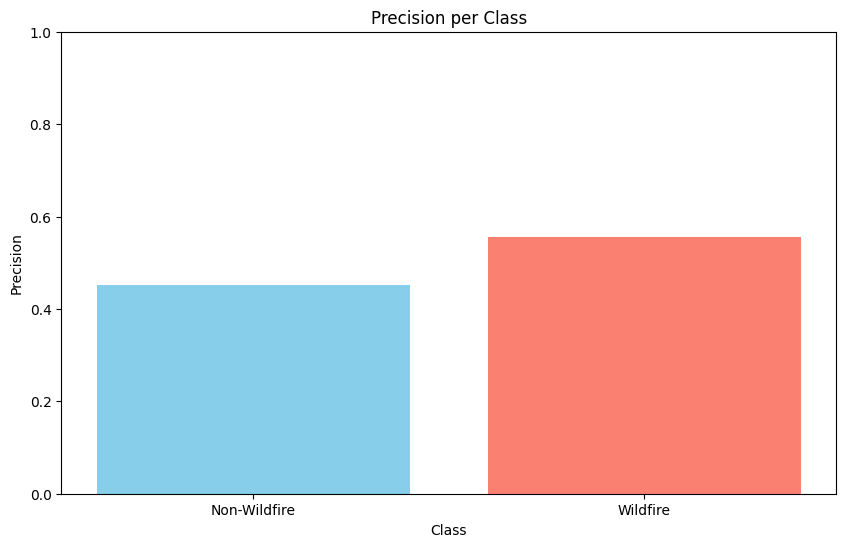

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(classes, precision_scores, color=['skyblue', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision per Class')
plt.ylim([0, 1])  # Đặt giới hạn trục y từ 0 đến 1
plt.show()

## Vẽ biểu đồ recall

Đoạn mã này tạo một biểu đồ cột để trực quan hóa giá trị recall (độ bao phủ) của từng lớp trong bài toán phân loại bằng Matplotlib. 
- Dòng plt.figure(figsize=(10, 6)) khởi tạo một biểu đồ mới với kích thước 10x6 inch, giúp biểu đồ rộng rãi và dễ quan sát. 
- Dòng plt.bar(classes, recall_scores, color=['lightgreen', 'lightcoral']) vẽ một cột cho mỗi lớp, chiều cao của cột thể hiện giá trị recall, mỗi cột được tô màu khác nhau để dễ phân biệt.
- Các dòng tiếp theo thêm nhãn và tiêu đề cho biểu đồ: plt.xlabel('Class') đặt nhãn cho trục x là "Class", plt.ylabel('Recall') đặt nhãn cho trục y là "Recall", và plt.title('Recall per Class') đặt tiêu đề cho biểu đồ. 
- Dòng plt.ylim([0, 1]) thiết lập giới hạn trục y từ 0 đến 1, phù hợp với thang giá trị của recall. 


(0.0, 1.0)

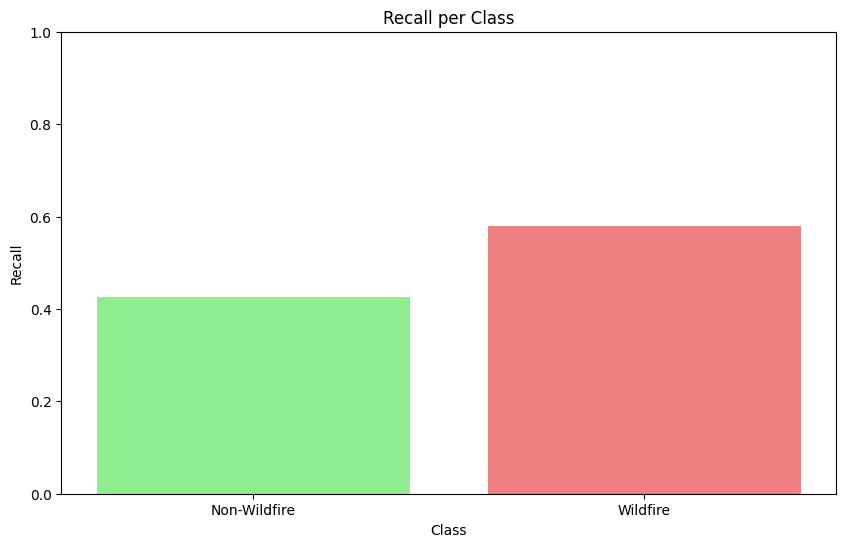

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(classes, recall_scores, color=['lightgreen', 'lightcoral'])
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall per Class')
plt.ylim([0, 1])  # Đặt giới hạn trục y từ 0

# Biểu đồ AUC-ROC (Đường cong Nhận diện)

Dòng lệnh này nhập hai hàm quan trọng là roc_curve và auc từ module metrics của thư viện scikit-learn.
- roc_curve được sử dụng để tính toán đường cong ROC (Receiver Operating Characteristic), biểu diễn mối quan hệ giữa tỷ lệ dương tính thực sự (true positive rate) và tỷ lệ dương tính giả (false positive rate) ở các ngưỡng phân loại khác nhau. 
- auc (Area Under the Curve) dùng để tính diện tích dưới đường cong ROC. Giá trị AUC cung cấp một chỉ số tổng quát về khả năng phân biệt giữa hai lớp của mô hình. AUC càng cao thì mô hình càng phân biệt tốt.  

In [62]:
from sklearn.metrics import roc_curve, auc

## Dự đoán xác suất trên tập validation

Dòng lệnh này sử dụng mô hình đã huấn luyện để tạo ra dự đoán trên tập dữ liệu kiểm tra (validation). 
- Phương thức model.predict(val_gen) sẽ xử lý tất cả các ảnh trong bộ sinh dữ liệu val_gen và trả về một tập các giá trị dự đoán. 
- Vì mô hình được thiết kế cho bài toán phân loại nhị phân với hàm kích hoạt sigmoid ở lớp cuối, nên mỗi giá trị trong predictions sẽ là một xác suất nằm trong khoảng từ 0 đến 1. 
- Các xác suất này thể hiện mức độ tin tưởng của mô hình rằng mỗi ảnh thuộc về lớp dương (ví dụ: "Wildfire"). 

In [63]:
predictions = model.predict(val_gen)

197/197 ━━━━━━━━━━━━━━━━━━━━ 66s 338ms/step


## Lấy ground truth từ validation generator

Dòng lệnh này gán các nhãn lớp thực tế từ tập dữ liệu kiểm tra vào biến y_true. 
- Thuộc tính classes của bộ sinh dữ liệu Keras val_gen chứa một mảng NumPy gồm các nhãn lớp dưới dạng số nguyên, mỗi giá trị tương ứng với lớp thực tế của một ảnh trong tập kiểm tra. 
- Việc lưu các nhãn này vào y_true giúp so sánh với dự đoán của mô hình để đánh giá hiệu suất bằng các chỉ số như accuracy, ma trận nhầm lẫn hoặc classification report.

In [64]:
y_true = val_gen.classes

## Tính toán ROC curve và AUC

Đoạn mã này tính toán và tóm tắt hiệu suất của mô hình phân loại nhị phân bằng cách sử dụng đường cong ROC (Receiver Operating Characteristic) và chỉ số diện tích dưới đường cong (AUC).

- Dòng đầu tiên, fpr, tpr, thresholds = roc_curve(y_true, predictions), tính toán đường cong ROC bằng cách so sánh các nhãn thực tế (y_true) với các xác suất dự đoán (predictions). 
- Hàm roc_curve trả về ba mảng: fpr (tỷ lệ dương tính giả), tpr (tỷ lệ dương tính thực) và thresholds (các ngưỡng xác suất dùng để phân loại mẫu là dương tính hoặc âm tính).
- Các giá trị này cho thấy sự thay đổi về độ nhạy và độ đặc hiệu của mô hình khi thay đổi ngưỡng phân loại.
- Dòng thứ hai, roc_auc = auc(fpr, tpr), tính diện tích dưới đường cong ROC (AUC) bằng hàm auc. 
- Chỉ số AUC là một giá trị duy nhất nằm trong khoảng từ 0 đến 1, tóm tắt khả năng phân biệt giữa hai lớp của mô hình trên tất cả các ngưỡng phân loại. 
- AUC càng cao thì hiệu suất phân loại tổng thể của mô hình càng tốt, với 1.0 là phân biệt hoàn hảo và 0.5 là không có khả năng phân biệt.

In [65]:
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

## Vẽ ROC curve

Đoạn mã này trực quan hóa đường cong ROC (Receiver Operating Characteristic) cho mô hình phân loại nhị phân của bạn bằng Matplotlib. 
- Dòng đầu tiên, plt.figure(figsize=(8, 6)), tạo một biểu đồ mới với kích thước 8x6 inch, giúp biểu đồ rõ ràng và dễ quan sát. 
- Dòng tiếp theo, plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc), vẽ đường cong ROC với trục hoành là tỷ lệ dương tính giả (False Positive Rate - fpr) và trục tung là tỷ lệ dương tính thực (True Positive Rate - tpr). 
- Đường cong này có màu cam đậm, độ dày 2 và có nhãn hiển thị giá trị AUC làm tròn đến hai chữ số thập phân.
- Dòng plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') vẽ một đường chéo đứt nét từ (0,0) đến (1,1), đại diện cho hiệu suất của một mô hình phân loại ngẫu nhiên, dùng làm đường tham chiếu. 
- plt.xlim([0.0, 1.0]) và plt.ylim([0.0, 1.05]) thiết lập giới hạn cho trục x và trục y để đảm bảo biểu đồ hiển thị đầy đủ đường cong ROC.
- Các dòng tiếp theo thêm nhãn cho trục và tiêu đề cho biểu đồ: plt.xlabel('False Positive Rate') đặt nhãn cho trục x, plt.ylabel('True Positive Rate') đặt nhãn cho trục y, và plt.title('Receiver Operating Characteristic (ROC)') đặt tiêu đề cho biểu đồ. 
- plt.legend(loc="lower right") đặt chú thích ở góc dưới bên phải để phân biệt đường ROC với đường tham chiếu. 
- Cuối cùng, plt.show() sẽ hiển thị biểu đồ hoàn chỉnh. 


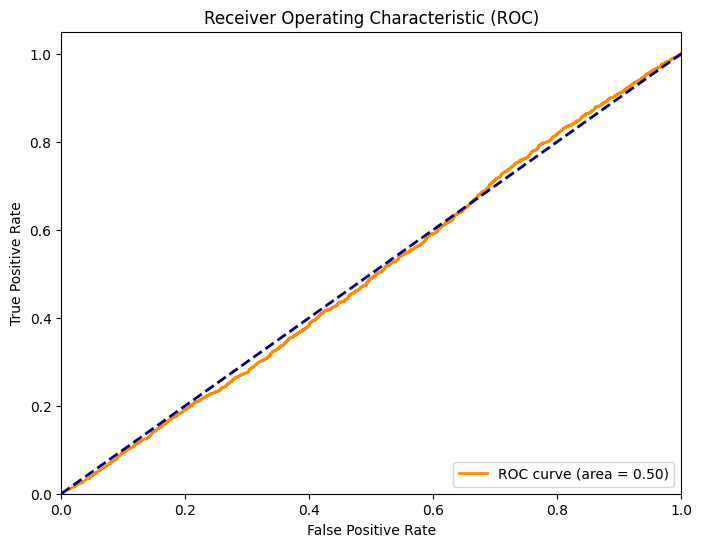

In [66]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()